# Random Forest

In [14]:
# + [markdown] jupyter={"outputs_hidden": false}
# http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29

# + jupyter={"outputs_hidden": false}
# !wget http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
# !wget http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names
# -

# ## With scikit-learn

# + jupyter={"outputs_hidden": false}

# Import Libaries
import numpy as np # Import the library from numpy package
import pandas as pd # Import the library from pandas package
from sklearn.ensemble import RandomForestClassifier # Import the classifier
from sklearn.model_selection import train_test_split # Import the classifier
from sklearn.tree import export_graphviz # Export the graphviz package

# Import necessary libraries
f = open('breast-cancer-wisconsin.data')  # Open input file
w = open('clean.data', 'w')  # Open output file for writing

# Clean the data by removing lines with missing values and write it to 'clean.data'
for line in f:
    if line.find('?') > -1:  # Skip lines with missing values indicated by '?'
        continue
    w.write(line)

f.close()  # Close input file
w.close()  # Close output file

column_names = [
    'sample_id', 'clump_thickness', 'uniformity_cell_size',
    'uniformity_cell shape', 'marginal_adhesion',
    'single_epithelial_cell_size', 'bare_nuclei',
    'bland_chromatin', 'normal_nucleoli', 'mitoses',
    'class'
]

# Read the cleaned data from 'clean.data' and assign column names
samples = pd.read_csv('clean.data', header=None, names=column_names, index_col=0)
samples

trainning_input = samples.iloc[:,:-1]  # Extract input features
target = samples.iloc[:,-1]  # Extract target variable

clf = RandomForestClassifier(max_depth=3, n_estimators=200)  # Create a random forest classifier

clf.fit(trainning_input, target)  # Train the classifier on the training data

# Calculate feature importances and sort them in descending order
importances = pd.Series(
    clf.feature_importances_ * 100,
    index=trainning_input.columns).sort_values(ascending=False)
importances

# Calculate the accuracy of the classifier on the training data
accuracy = 100 * clf.score(trainning_input, target)

# Print the accuracy
print(accuracy)

# Perform multiple train-test splits and evaluate the classifier on each split
for test_size in [0.01, 0.1, 0.2, 0.5, 0.8, 0.9, 0.99]:
    X_train, X_test, y_train, y_test = train_test_split(
        trainning_input, target, test_size=test_size)
    tclf = RandomForestClassifier(max_depth=3)  # Create a new random forest classifier
    tclf.fit(X_train, y_train)  # Train the classifier on the training data
    score = tclf.score(X_test, y_test)  # Calculate the accuracy on the test data
    print(f'{1 - test_size:.1%} {score:.2%}')  # Print the test size and accuracy

# Random number generator


97.80380673499268
99.0% 100.00%
90.0% 95.65%
80.0% 95.62%
50.0% 96.20%
20.0% 96.71%
10.0% 96.91%
1.0% 96.16%


# PCA

In [9]:
pip install pygenomics

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pygenomics: filename=pygenomics-0.1.5-py3-none-any.whl size=34643 sha256=4e61dd9de957423bcde6b9cfaf225367c19ae924d068d093c4c4ae81d901a21d
  Stored in directory: c:\users\92318\appdata\local\pip\cache\wheels\56\18\35\731e1d3d7054ea5cf6076a4215c6285850bae9962d16131a09
Successfully built pygenomics
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
from sklearn.decomposition import PCA
import numpy as np

from genomics.popgen.pca import plot
# -

# ## Meta-data load

# + jupyter={"outputs_hidden": false}
f = open('relationships_w_pops_041510.txt')
ind_pop = {}
f.readline()  # header
for l in f:
    toks = l.rstrip().split('\t')
    fam_id = toks[0]
    ind_id = toks[1]
    pop = toks[-1]
    ind_pop['/'.join([fam_id, ind_id])] = pop
f.close()
# -

# ## With scikit-learn

# + jupyter={"outputs_hidden": false}
f = open('hapmap10_auto_noofs_ld_12.ped')
ninds = 0
ind_order = []
for line in f:
    ninds += 1
    toks = line[:100].replace(' ', '\t').split('\t') #  for speed
    fam_id = toks[0]
    ind_id = toks[1]
    ind_order.append('%s/%s' % (fam_id, ind_id))
nsnps = (len(line.replace(' ', '\t').split('\t')) - 6) // 2
f.close()

# + jupyter={"outputs_hidden": false}
pca_array = np.empty((ninds, nsnps), dtype=int)
print(pca_array.shape)
f = open('hapmap10_auto_noofs_ld_12.ped')
for ind, line in enumerate(f):
    snps = line.replace(' ', '\t').split('\t')[6:]
    for pos in range(len(snps) // 2):
        try:
            a1 = int(snps[2 * pos])
            a2 = int(snps[2 * pos + 1])
            my_code = a1 + a2 - 2
        except ValueError:
            my_code = -1  # Assigning -1 for non-numeric SNPs
        pca_array[ind, pos] = my_code
f.close()

# + jupyter={"outputs_hidden": false}
my_pca = PCA(n_components=8)
my_pca.fit(pca_array)
trans = my_pca.transform(pca_array)
#Memory required

# + jupyter={"outputs_hidden": false}
sc_ind_comp = {}
for i, ind_pca in enumerate(trans):
    sc_ind_comp[ind_order[i]] = ind_pca
plot.render_pca_eight(sc_ind_comp, cluster=ind_pop)

# + jupyter={"outputs_hidden": false}

(1397, 1457897)


MemoryError: Unable to allocate 15.2 GiB for an array with shape (1397, 1457897) and data type float64

# Decsion Tree

[Text(0.5, 0.875, 'uniformity_cell_size <= 2.5\ngini = 0.455\nsamples = 683\nvalue = [444, 239]\nclass = Benign'),
 Text(0.25, 0.625, 'bare_nuclei <= 5.5\ngini = 0.056\nsamples = 418\nvalue = [406, 12]\nclass = Benign'),
 Text(0.125, 0.375, 'clump_thickness <= 6.5\ngini = 0.024\nsamples = 410\nvalue = [405, 5]\nclass = Benign'),
 Text(0.0625, 0.125, 'gini = 0.01\nsamples = 405\nvalue = [403, 2]\nclass = Benign'),
 Text(0.1875, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = Malignant'),
 Text(0.375, 0.375, 'clump_thickness <= 2.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]\nclass = Malignant'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Benign'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = Malignant'),
 Text(0.75, 0.625, 'uniformity_cell shape <= 2.5\ngini = 0.246\nsamples = 265\nvalue = [38, 227]\nclass = Malignant'),
 Text(0.625, 0.375, 'clump_thickness <= 5.5\ngini = 0.34\nsamples = 23\nvalue = [18, 5]\nclass = Benign')

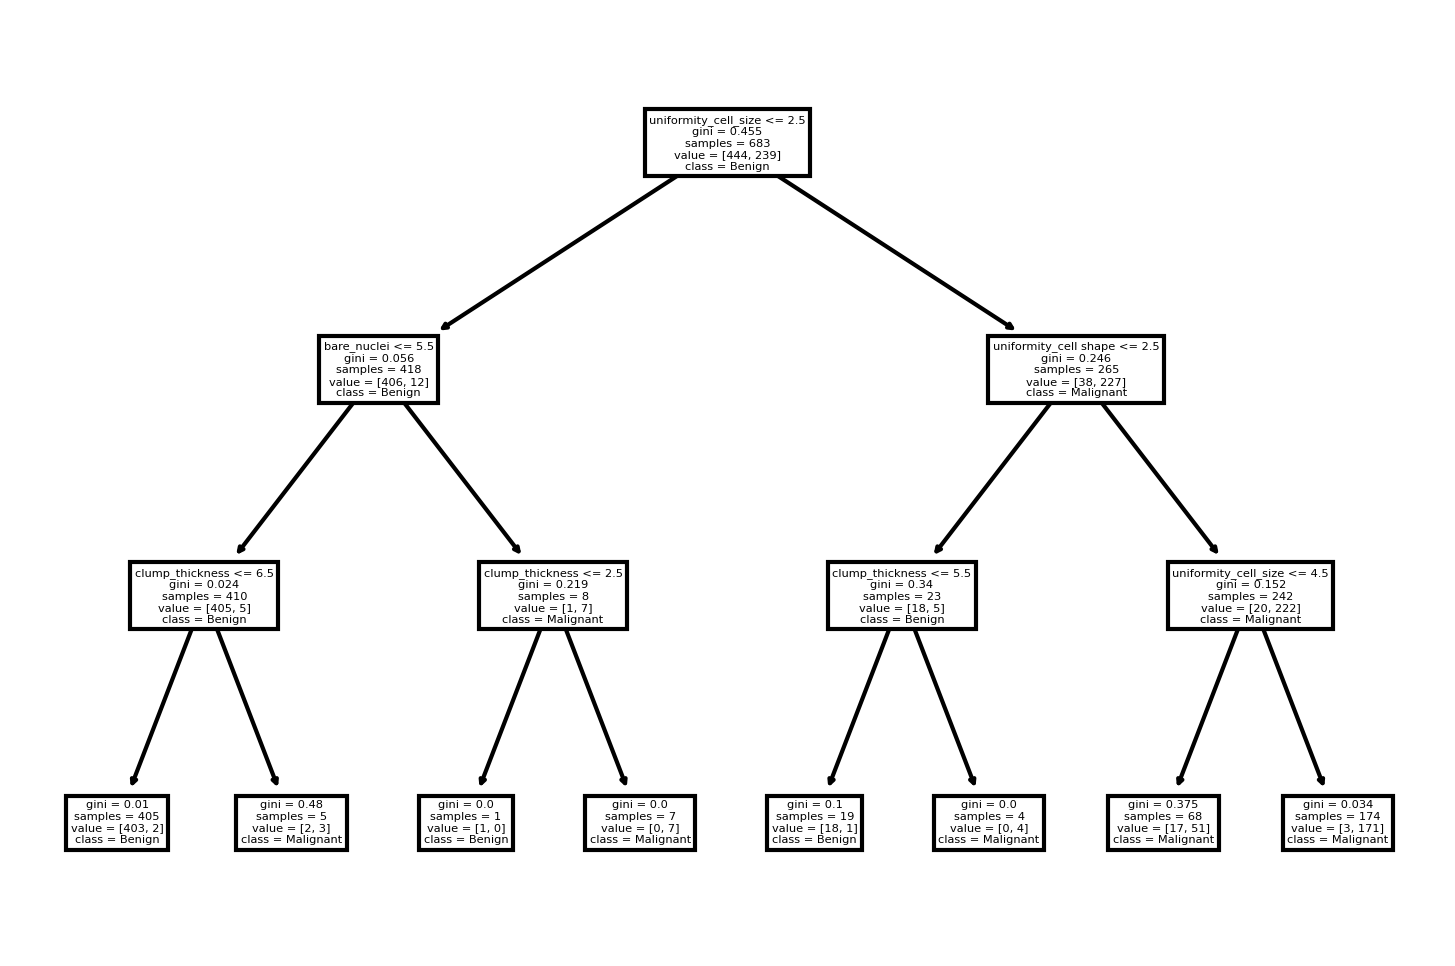

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree

# + [markdown] jupyter={"outputs_hidden": false}
# http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29

# + jupyter={"outputs_hidden": false}
# !wget http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
# !wget http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names
# -

# ## With scikit-learn

# + jupyter={"outputs_hidden": false}
f = open('breast-cancer-wisconsin.data')
w = open('clean.data', 'w')
for line in f:
    if line.find('?') > -1:
        continue
    w.write(line)
f.close()
w.close()

# + jupyter={"outputs_hidden": false}
column_names = [
    'sample_id', 'clump_thickness', 'uniformity_cell_size',
    'uniformity_cell shape', 'marginal_adhesion',
    'single_epithelial_cell_size', 'bare_nuclei',
    'bland_chromatin', 'normal_nucleoli', 'mitoses',
    'class'
]
samples = pd.read_csv('clean.data', header=None, names=column_names, index_col=0)
samples

# + jupyter={"outputs_hidden": false}
training_input = samples.iloc[:,:-1]
target = samples.iloc[:,-1].apply(lambda x: 0 if x == 2 else 1)

# + jupyter={"outputs_hidden": false}
clf = tree.DecisionTreeClassifier(max_depth=3)

# + jupyter={"outputs_hidden": false}
clf.fit(training_input, target)

# + jupyter={"outputs_hidden": false}
importances = pd.Series(
    clf.feature_importances_ * 100,
    index=training_input.columns).sort_values(ascending=False)
importances

# + jupyter={"outputs_hidden": false}
100 * clf.score(training_input, target)

# + jupyter={"outputs_hidden": false}
fig, ax = plt.subplots(1, dpi=300)
tree.plot_tree(clf,ax=ax, feature_names=training_input.columns, class_names=['Benign', 'Malignant'])
# -

# Clustering

In [25]:
import os

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import numpy as np

from genomics.popgen.pca import plot
# -

# ## Meta-data load

# + jupyter={"outputs_hidden": false}
f = open('relationships_w_pops_041510.txt')
ind_pop = {}
f.readline()  # header
for l in f:
    toks = l.rstrip().split('\t')
    fam_id = toks[0]
    ind_id = toks[1]
    pop = toks[-1]
    ind_pop['/'.join([fam_id, ind_id])] = pop
f.close()
# -

# ## With scikit-learn

# + jupyter={"outputs_hidden": false}
f = open('hapmap10_auto_noofs_ld_12.ped')
ninds = 0
ind_order = []
for line in f:
    ninds += 1
    toks = line[:100].replace(' ', '\t').split('\t') #  for speed
    fam_id = toks[0]
    ind_id = toks[1]
    ind_order.append('%s/%s' % (fam_id, ind_id))
nsnps = (len(line.replace(' ', '\t').split('\t')) - 6) // 2
print (nsnps)
f.close()

# + jupyter={"outputs_hidden": false}
all_array = np.empty((ninds, nsnps), dtype=int)
f = open('../Chapter06/hapmap10_auto_noofs_ld_12.ped')
for ind, line in enumerate(f):
    snps = line.replace(' ', '\t').split('\t')[6:]
    for pos in range(len(snps) // 2):
        a1 = int(snps[2 * pos])
        a2 = int(snps[2 * pos])
        my_code = a1 + a2 - 2
        all_array[ind, pos] = my_code
f.close()
#slow
# -

predict_case = all_array[-1, :]
pca_array = all_array[:-1,:]

last_ind = ind_order[-1]
last_ind, ind_pop[last_ind]

my_pca = PCA(n_components=2)
my_pca.fit(pca_array)
trans = my_pca.transform(pca_array)

sc_ind_comp = {}
for i, ind_pca in enumerate(trans):
    sc_ind_comp[ind_order[i]] = ind_pca
plot.render_pca(sc_ind_comp, cluster=ind_pop)


# + jupyter={"outputs_hidden": false}
def plot_kmeans_pca(trans, kmeans):
    x_min, x_max = trans[:, 0].min() - 1, trans[:, 0].max() + 1
    y_min, y_max = trans[:, 1].min() - 1, trans[:, 1].max() + 1
    mesh_x, mesh_y = np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 0.5))

    k_surface = kmeans.predict(np.c_[mesh_x.ravel(), mesh_y.ravel()]).reshape(mesh_x.shape)
    fig, ax = plt.subplots(1,1, dpi=300)
    ax.imshow(
        k_surface, origin="lower", cmap=plt.cm.Pastel1,
        extent=(mesh_x.min(), mesh_x.max(), mesh_y.min(), mesh_y.max()),
    )

    ax.plot(trans[:, 0], trans[:, 1], "k.", markersize=2)
    ax.set_title("KMeans clustering of PCA data")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    return ax


# + jupyter={"outputs_hidden": false}
kmeans11 = KMeans(n_clusters=11).fit(trans)
plot_kmeans_pca(trans, kmeans11)
# -

kmeans4 = KMeans(n_clusters=4).fit(trans)
plot_kmeans_pca(trans, kmeans4)

pca_predict = my_pca.transform([predict_case])
kmeans4.predict(pca_predict)

last_train = ind_order[-2]
last_train, ind_pop[last_train]

kmeans4.predict(trans)[0]

1457897


MemoryError: Unable to allocate 7.59 GiB for an array with shape (1397, 1457897) and data type int32